# Learnings for Visualization

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle chart
import seaborn as sns
import pandas as pd
import numpy as np
import altair as alt
from sklearn.metrics import confusion_matrix

mpl.style.use('ggplot') # optional: for ggplot-like style

# Set basic parameters for plot

## Visual adjustments

### Size of dots in a scatter plot

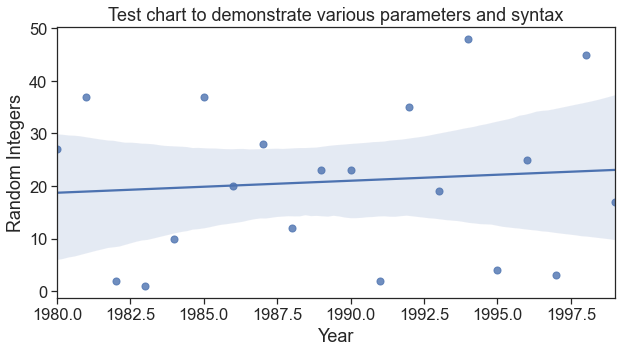

In [5]:
plt.figure(figsize=(10,5)) # set size of figure

sns.set(font_scale=1.5) # scale font of axis descriptions
sns.set_style('ticks') # change background to white background - alternative: 'whitegrid'

df_linear_regression = pd.DataFrame({'Years': list(range(1980, 2000)), 'Number': np.random.randint(50, size=20)})
ax = sns.regplot(data=df_linear_regression, x='Years', y='Number', marker="o", scatter_kws={'s': 50})
ax.set(xlabel='Year', ylabel='Random Integers')
ax.set_title('Test chart to demonstrate various parameters and syntax');

### Fontsize of labels

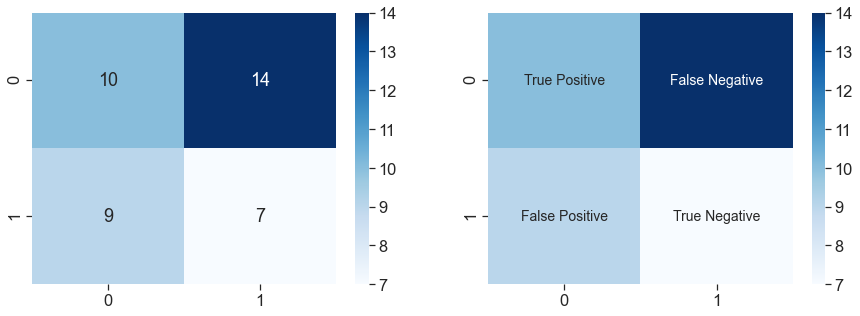

In [6]:
# create random vectors
y_true = np.random.randint(2, size=40)
y_hat = np.random.randint(2, size=40)

# create confusion matrix and create custom labels in the same shape as the data (2,2)
matrix = confusion_matrix(y_true, y_hat)
labels = np.array([['True Positive', 'False Negative'], ['False Positive', 'True Negative']])

# create figures and axes
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plot confusion matrices on relevant ax and adjust fontsize of labels
sns.heatmap(matrix, annot=True, cmap=plt.cm.Blues, ax=ax0)
sns.heatmap(matrix, annot=labels, annot_kws={'fontsize': 14}, cmap=plt.cm.Blues, fmt='', ax=ax1);

### Text comments and labels

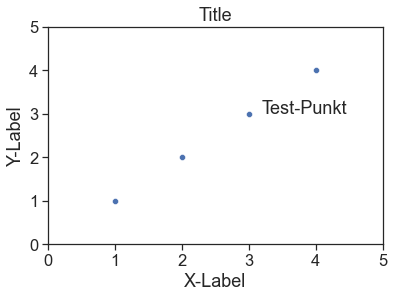

In [12]:
sns.scatterplot(x=[1,2,3,4],y=[1,2,3,4])
plt.text(x=3.2, y=3, s="Test-Punkt")
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
plt.title("Title")
plt.ylim(0,5)
plt.xlim(0,5);

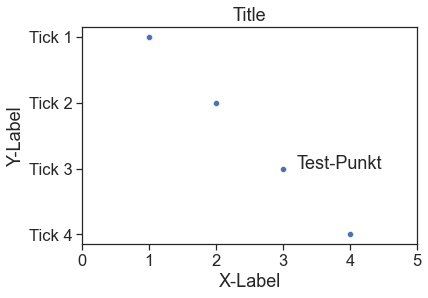

In [16]:
sns.scatterplot(x=[1,2,3,4],y=["Tick 1", "Tick 2", "Tick 3", "Tick 4"])
plt.text(3.2, 2, "Test-Punkt") #As Y-Labels are strings, the y-position of the text needs to reference \
                                    # the index position, instead of a value
plt.xlabel("X-Label")
plt.ylabel("Y-Label")
plt.title("Title")

plt.xlim(0,5);

## Color of plots 

In [17]:
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


## Setup subplots

### With seaborn

In [34]:
# Set general theme for seaborn
sns.set_theme(style='darkgrid')

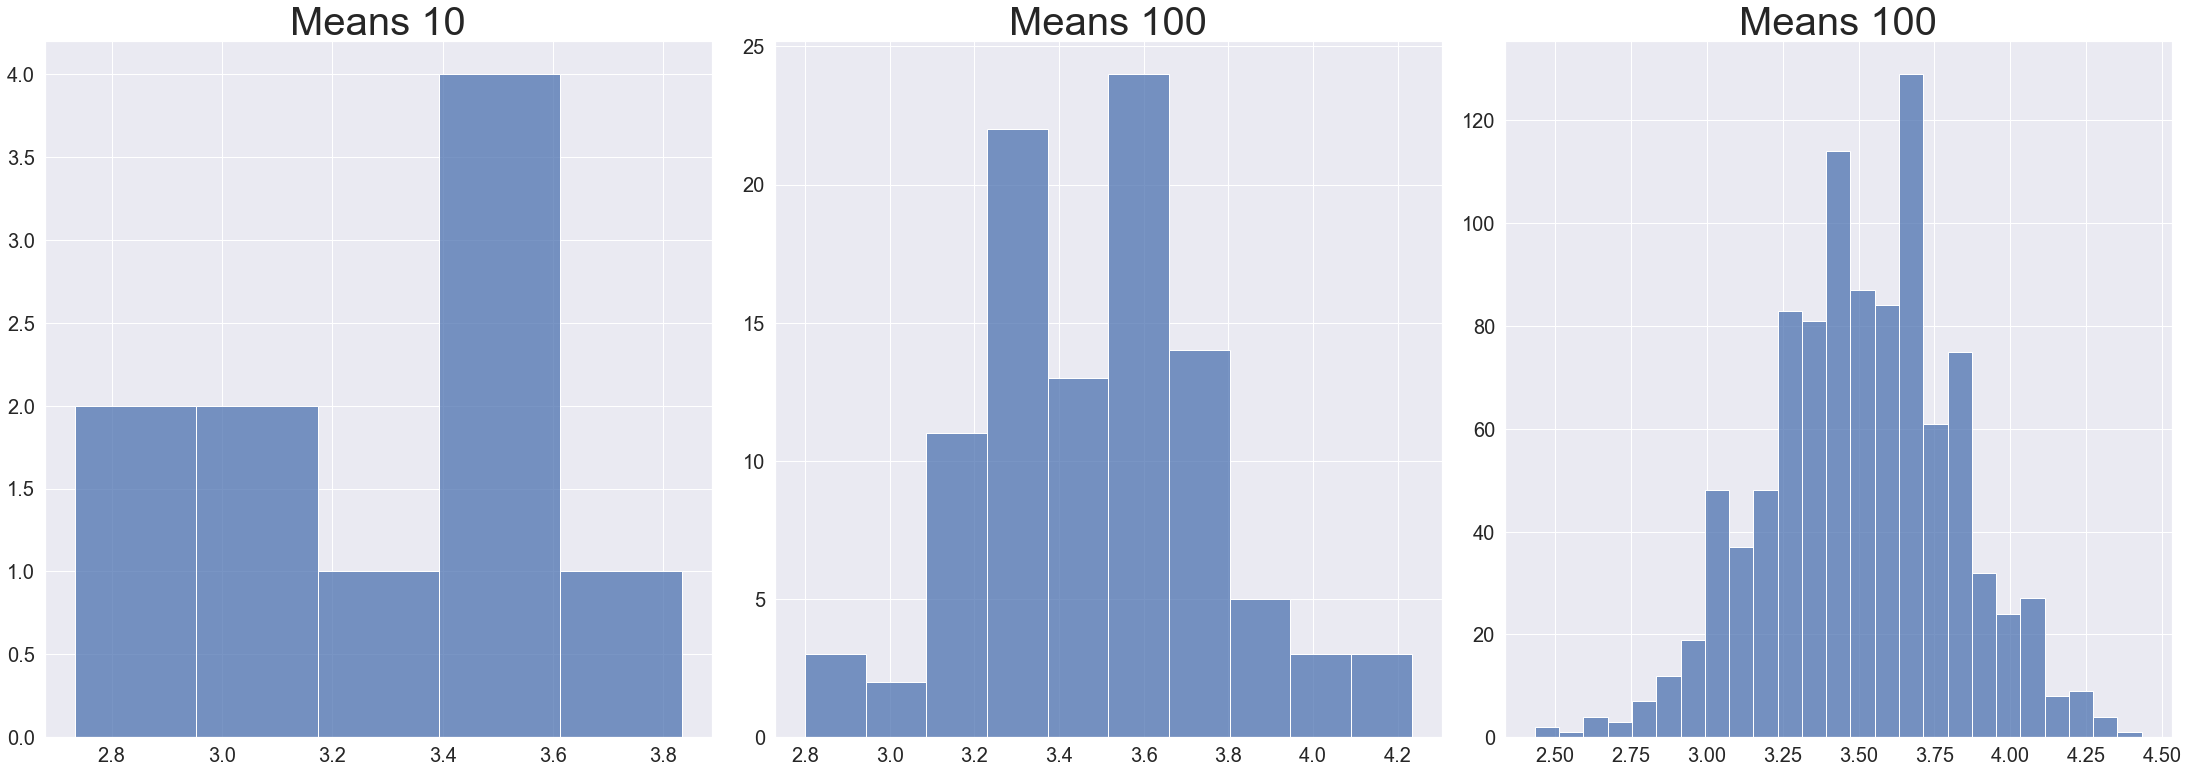

In [62]:
f, axs = plt.subplots(1, 3, figsize=(30,10))
f.tight_layout(pad=0, w_pad=2.5, h_pad=0) # adjust spaces between subplots to avoid overlaps

# Calcucalte 10, 100, 1000 sample means with sample size 30
means10 = [np.random.randint(1, 7, 30).mean() for i in range(10)]
means100 = [np.random.randint(1, 7, 30).mean() for i in range(100)]
means1000 = [np.random.randint(1, 7, 30).mean() for i in range(1000)]

sns.histplot(means10, ax=axs[0])
#axs[count].set_ylim(-0.4,0)
axs[0].set_title("Means 10", fontsize=40)
axs[0].xaxis.label.set_visible(False)
axs[0].yaxis.label.set_visible(False)
axs[0].tick_params(labelsize=20)

sns.histplot(means100, ax=axs[1])
axs[1].set_title("Means 100", fontsize=40)
axs[1].xaxis.label.set_visible(False)
axs[1].yaxis.label.set_visible(False)
axs[1].tick_params(labelsize=20)


sns.histplot(means1000, ax=axs[2])
axs[2].set_title("Means 100", fontsize=40)
axs[2].xaxis.label.set_visible(False)
axs[2].yaxis.label.set_visible(False)
axs[2].tick_params(labelsize=20)

#axs[0].set_xlabel('Value', fontsize=30)
#axs[0].set_ylabel('Count', fontsize=20);

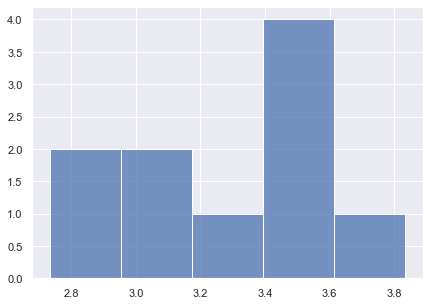

In [88]:
plt.figure(figsize=(7,5))
h = sns.histplot(means10)
#axs[count].set_ylim(-0.4,0)
#h.set_title("Means 10", fontsize=40)
h.xaxis.label.set_visible(False)
h.yaxis.label.set_visible(False)
#h.tick_params(labelsize=20)

In [89]:
df_means10 = pd.DataFrame(means10, columns=['means'])

In [98]:
alt.Chart(df_means10).mark_bar().encode(alt.X('means', bin=True), y='count()')

alt.Chart(...)

In [96]:
df_means10.sort_values(by='means')

,means
5,2.733333
6,2.900000
7,3.000000
4,3.033333
2,3.266667
8,3.400000
0,3.533333
1,3.533333
9,3.600000
3,3.833333


### With artist layer and matplotlib only

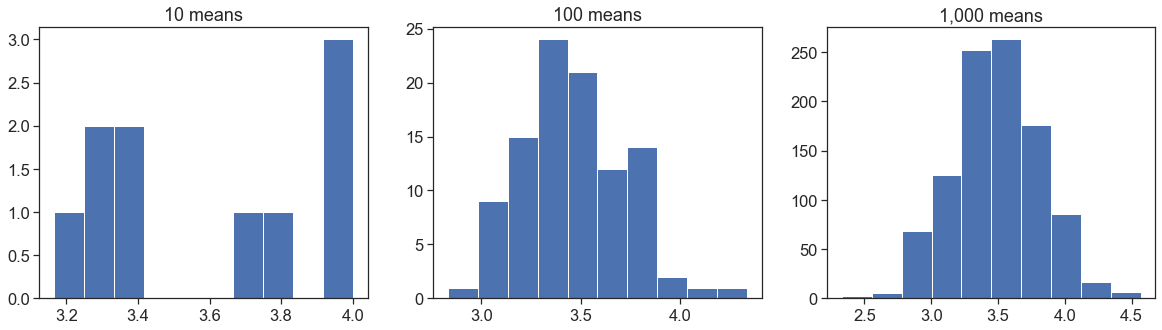

In [18]:
# Calcucalte 10, 100, 1000 sample means with sample size 30
means10 = [np.random.randint(1, 7, 30).mean() for i in range(10)]
means100 = [np.random.randint(1, 7, 30).mean() for i in range(100)]
means1000 = [np.random.randint(1, 7, 30).mean() for i in range(1000)]

# Create plot area with 3 plots in one row
fig = plt.figure(figsize=(20,5))
ax10 = fig.add_subplot(131)
ax100 = fig.add_subplot(132)
ax1000 = fig.add_subplot(133)

# Create histograms of the means
ax10.hist(means10)
ax10.set_title('10 means')
ax100.hist(means100)
ax100.set_title('100 means')
ax1000.hist(means1000)
ax1000.set_title('1,000 means')

# Show a histogram of the means
plt.show()

### With artist layer and plot function of pandas

---  
**Copyright:** Description below copied from coursera.org course ___[Data Visualization with Python](https://www.coursera.org/learn/python-for-data-visualization/home/welcome)___  

---

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

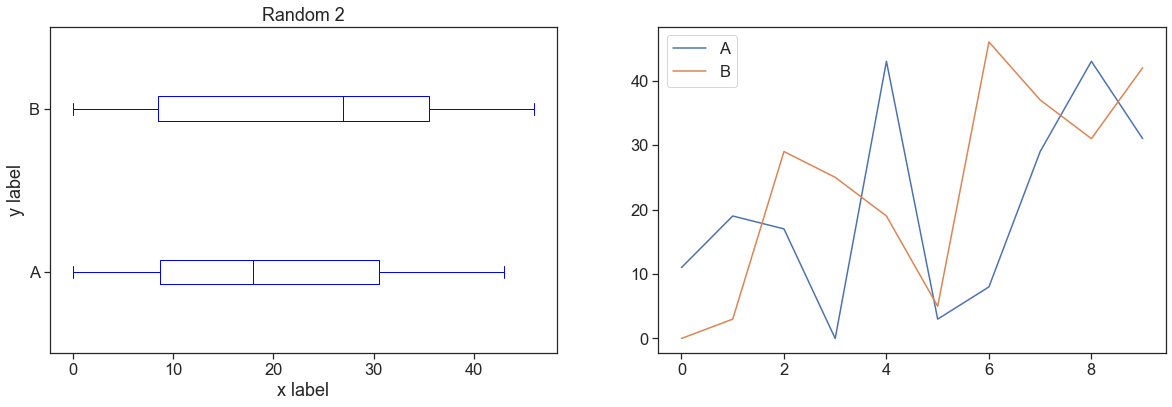

In [19]:
df_subplots = pd.DataFrame({'A': np.random.randint(50, size=10), 'B': np.random.randint(50, size=10)})


fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_subplots.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Random 1')
ax0.set_xlabel('x label')
ax0.set_ylabel('y label')

# Subplot 2: Line plot
df_subplots.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax0.set_title('Random 2')
ax0.set_xlabel('x label')
ax0.set_ylabel('y label')

plt.show()

# Types

## Line graph

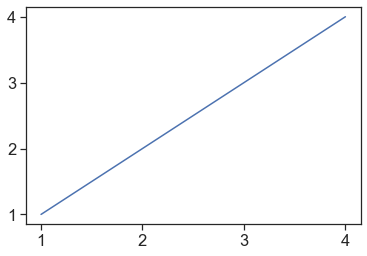

In [21]:
plt.plot([1,2,3,4],[1,2,3,4]);

Seaborn lineplots include per standard a confidence interval as "shadow" of the line graph. This is based on bootstrapping!! See [here](https://stackoverflow.com/questions/46125182/is-seaborn-confidence-interval-computed-correctly) for details.

In [22]:
alt_data = pd.DataFrame({"A": [0,1,2,3,4], "B": [0,1,2,3,4]})

alt.Chart(alt_data).mark_line().encode(x = "A", y = "B")

alt.Chart(...)

## Dots

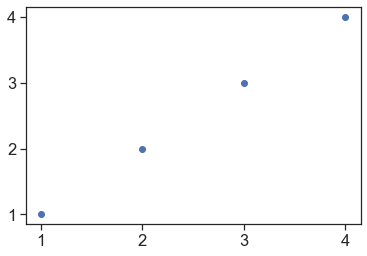

In [24]:
plt.plot([1,2,3,4],[1,2,3,4], "bo");

## Bar Chart (stacked)

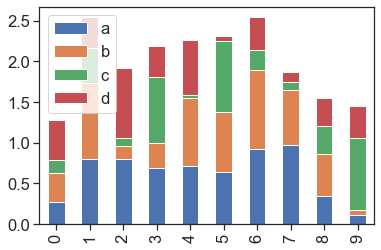

In [25]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar(stacked=True);

## Histogram

### With self-defined bins

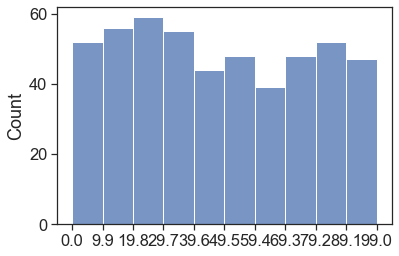

In [28]:
series_data = np.random.randint(100, size=500)
count, bin_edges = np.histogram(series_data)
sns.histplot(series_data, kde=False)
plt.xticks(bin_edges)
plt.show;

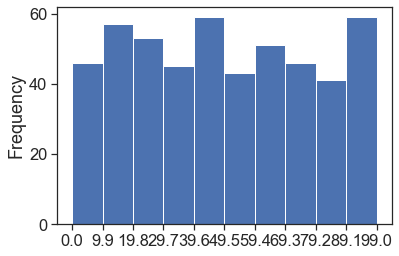

In [29]:
series_data = np.random.randint(100, size=500)
df_series_data = pd.Series(series_data)
count, bin_edges = np.histogram(series_data)
df_series_data.plot(kind="hist", xticks=bin_edges);

## Waffle Chart

**As alternative to the following, check out pyWaffle module.**

---  
**Copyright:** Code (with minor adjustments) copied from coursera.org course ___[Data Visualization with Python](https://www.coursera.org/learn/python-for-data-visualization/home/welcome)___  

---

Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1. **categories**: Unique categories or classes in dataframe.
> 2. **values**: Values corresponding to categories or classes.
> 3. **height**: Defined height of waffle chart.
> 4. **width**: Defined width of waffle chart.
> 5. **colormap**: Colormap class
> 6. **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

In [30]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:

In [31]:
width = 40 # width of chart
height = 10 # height of chart

categories = ['Denmark', 'Norway', 'Sweden'] # categories

values = [3901, 2327, 5866] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

And now let's call our function to create a `waffle` chart.

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

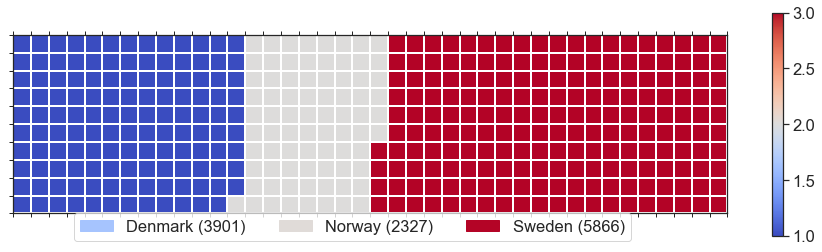

In [32]:
create_waffle_chart(categories, values, height, width, colormap);